03-2 선형회귀
- K-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해하고 사이킷런을 사용해 여러 모델을 만들어보고자 함

In [14]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [15]:
from sklearn.model_selection import train_test_split

#훈련세트와 테스트세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#훈련세트와 테스트세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [16]:
#최근접 이웃 개수를 3으로 하는 모델을 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회귀모델을 훈련
knr.fit(train_input, train_target)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
print(knr.predict([[50]]))
# 실제 농어의 무게는 1.5키로라고 했는데 예측은 1kg 정도라고 나옴

[1033.33333333]


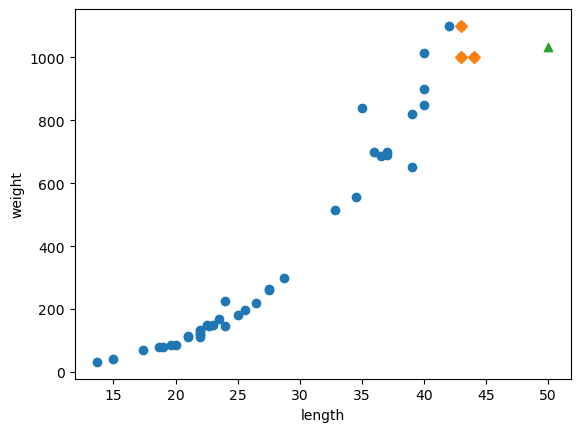

In [23]:
import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

#훈련세트의 산점도를 그림
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

#50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 그래프에서 50cm, 1033g인 농어는 세모로 표시됨
- 그 주변 샘플은 marker =D로 표기

In [ ]:
print(np.mean(train_target[indexes]))
#이웃 샘플의 평균을 구해봄

1033.3333333333333


In [25]:
#가장 가까운 샘플을 찾아 타깃을 평균하기 때문에 결과가 이렇게 나옴
#길이가 100cm인 농어도 1033g 으로 예측함
print(knr.predict([[100]]))

[1033.33333333]


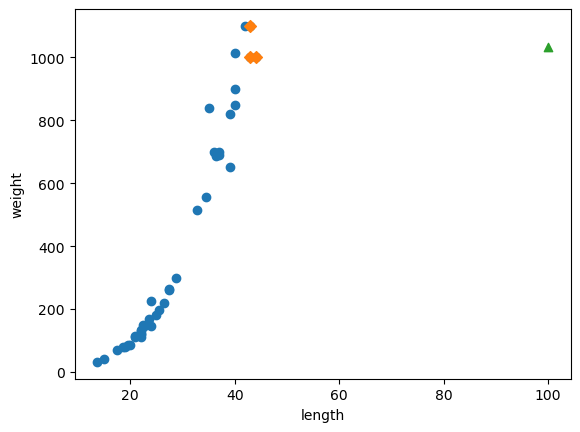

In [26]:
#100cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[100]])

#훈련세트의 산점도를 그림
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

#50cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 이런식의 데이터면 농어의 길이가 늘어나도 무게가 안늘어 나는 결과가 나옴
- 다른 알고리즘 사용하는게 더 정확할 수 있음
- "선형회귀"

In [ ]:
#linearRegression 클래스로 선형 회귀 알고리즘
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀모델을 훈련
lr.fit(train_input, train_target)

#50cm 농어 예측
print(lr.predict([[50]]))
#더 높은 무게로 예측함, 근처 이웃 데이터를 통해 예측하는게 아닌 기울기를 그려 길이에 맞는 무게를 예측함

[1241.83860323]


In [28]:
#lr.coef_→ 기울기(계수, weight) / lr.intercept_→ y절편(bias)
#학습된 모델의 기울기와 절편 확인
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


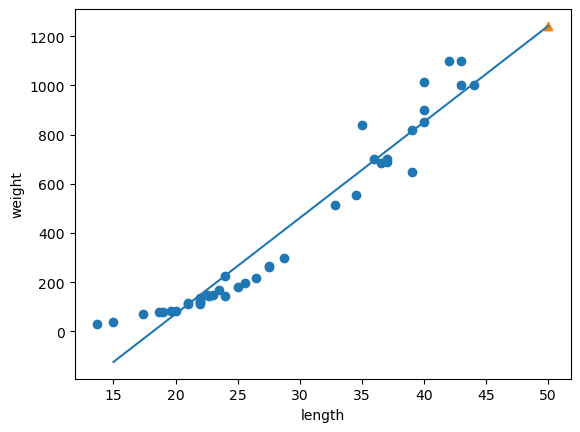

In [ ]:
#훈련세트의 산점도를 그림
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프 그림
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#이 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선
#예측한 결과가 직선의 연장선에 있는걸 확인 할 수 있음

In [ ]:
#훈련 세트와 테스트 세트에 대한 R2 점수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
#테스트점수와 훈련 세트의 점수가 조금 차이나지만
#그것보다 산점도를 보면 직선이 아니라 왼쪽 위로 조금 구부러진 곡선에 가까움

0.9398463339976041
0.8247503123313559


In [31]:
#최적의 곡선을 찾는 방법 (다항 회귀)
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))


In [ ]:
#데이터셋 크기 확인
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
#모델 새로 훈련시키고 예측했더니 실제 무게인 1.5키로와 유사한 값이 나옴

[1573.98423528]


In [34]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


이 모델은 다음과 같은 그래프를 학습함
무게 = 1.01 x 길이2 - 21.6 x 길이 + 116.05

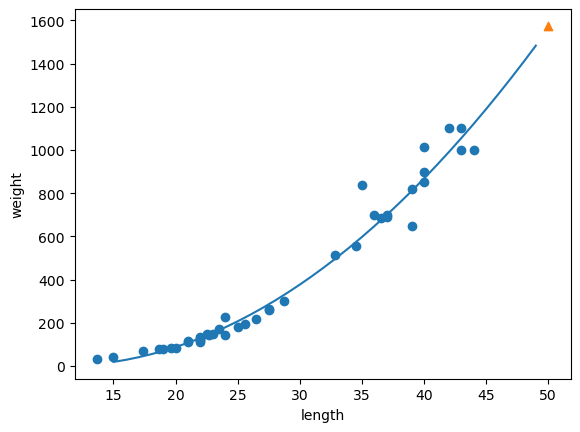

In [ ]:
point = np.arange(15,50)
plt.scatter(train_input, train_target)

#15~49까지 2차 방정식 그래프 그림
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter(50,1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 데이터에 맞는 그래프가 그려짐


In [36]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


0.9706807451768623
0.9775935108325122


3-3 특성 공학과 규제
-다중 회귀

In [122]:
import pandas as pd

In [123]:
perch_full = pd.read_csv('https://bit.ly/perch_csv_data') #csv 파일을 웹에서 불러옴
perch_full.head()
# 3개 특성

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [124]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [125]:
#훈련세트와 테스트세트로 나눔
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_full,perch_weight, random_state=42)

In [126]:
from sklearn.preprocessing import PolynomialFeatures
#PolynomialFeatures- 특성의 개수 파악
#sklearn.preprocessing- 전처리 담당 (입력 데이터를 ‘학습하기 좋은 형태로 바꿔주는 도구 모음집), 정규화·표준화·인코딩

In [127]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]])) #2개의 특성 2와 3으로 이루어진 sample 적용

[[1. 2. 3. 4. 6. 9.]]


In [128]:
poly = PolynomialFeatures(include_bias=False) #특성 개수 파악
poly.fit([[2,3]]) #새롭게 만들 특성 조합을 찾아줌
print(poly.transform([[2,3]])) #실제로 데이터를 변환
#원래 2개의 입력값(2,3)을 PolynomialFeatures로 확장하여 5개의 특징값으로 늘렸다라는 뜻

[[2. 3. 4. 6. 9.]]


In [129]:
#train_input 변환한 데이터를 train_poly에 저장하고 크기를 확인
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
#결과 보면 특성이 9개가 됨

(42, 9)


In [130]:
poly.get_feature_names_out()
#특성이 어떤 입력의 조합으로 만들어졌는지 알려줌

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [131]:
test_poly = poly.transform(test_input)
#테스트세트 변환

In [132]:
#모델 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
#훈련 모델 정확도 0.99!

0.9903183436982126


In [133]:
#테스트모델 점수 확인
print(lr.score(test_poly, test_target))
#테스트모델 보다 훈련모델 정확도가 높음. 


0.9714559911594095


In [134]:
#특성 더 많이 추가
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
#특성 55개 됨

(42, 55)


In [135]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
#훈련모델 정확도 더 높아짐

0.9999999999976599


In [136]:
print(lr.score(test_poly, test_target))
#특성의 개수를 늘리면 선형모델은 강력해짐
#훈련세트에 너무 과대적합 되므로 테스트 세트는 정확도가 매우 떨어짐

-144.4072001577299


"규제"는 머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것<br>
모델이 훈련세트에 과대적합되지 않도록 만드는 것<br>
특성에 곱해지는 계수를 작게 만드는 일

In [137]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
#훈련세트로 학습한 변환기를 사용해 테스트세트 까지 변환해야 함!
#train_scaled와 test_scaled가 준비됨

선형회귀모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부름<br>
릿지- 계수를 제곱한 값을 기준으로 규제를 적용<br>
라쏘- 계수의 절댓값을 기준으로 규제를 적용<br>
일반적으로 릿지를 조금 더 선호함. (라쏘는 0으로 만들 수 있기 때문에)

In [138]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
#조금 점수가 낮아짐

0.9896101671037343


In [139]:
print(ridge.score(test_scaled, test_target))
#테스트 점수 정확도가 정상으로 돌아옴. 둘다 좋은 성능을 내는 모델 만듬

0.9790693977615383


In [145]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [146]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    #ridge 모델 만듬
    ridge = Ridge(alpha=alpha)
    #ridge 모델 훈련
    ridge.fit(train_scaled, train_target)
    #훈련점수 테스트점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

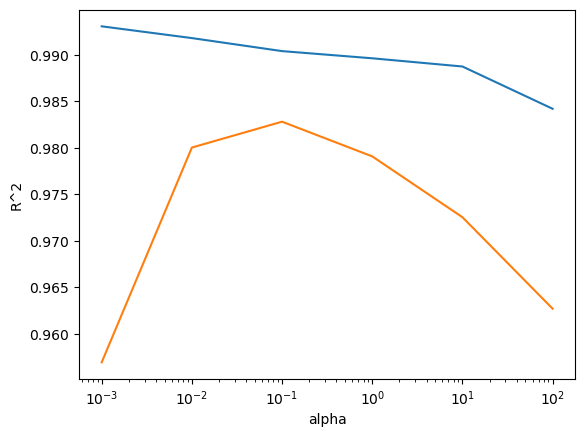

In [147]:
#그래프 그림
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

파란색-훈련세트, 주황색-테스트세트<br>
적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 점수가 가장 높은 10^-1 구간<br>
alpha 값을 0.1로 해서 최종 모델을 훈련시킴

In [149]:
#릿지 회귀
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9903815817570367
0.9827976465387017


In [ ]:
#라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
#라쏘도 과대적합을 잘 억제했음

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))
#테스트세트의 점수도 좋음

0.9800593698421884


In [ ]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    # waining이 뜸 - 라쏘모델을 훈련할때 발생
    # 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복회수가 부족할 때 이런 경고가 생김

/home/user/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/user/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


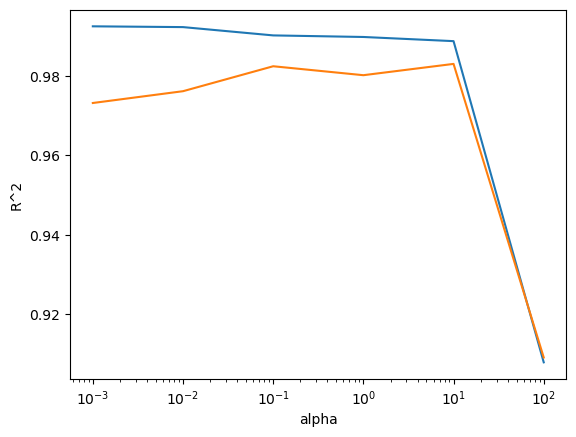

In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#파란색-훈련세트, 주황색-테스트세트, 왼쪽은 과대적합이고 오른쪽으로 갈 수록 훈련세트와 테스트세트 점수가 좁혀짐 (과소적합)
#라쏘모델에서 최적의 alpha 값은 10임

In [156]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))
#라쏘 모델의 계수 중 0인것을 세어봄
#55개의 특성을 라쏘에 주입했지만 사용한 특성은 15개임. 
#과대적합을 제어하는 방법을 배움

40
